In [10]:

# Asegurar instalación de PyYAML en el entorno actual
import sys
!{sys.executable} -m pip install pyyaml


In [11]:
# ⚙️ Setup inicial en Google Colab

# Si no tienes git instalado o es tu primera vez:
# !apt-get install git

# 🚨 Si es repositorio privado, deberás usar tu token
# Clona el repositorio del curso (puedes cambiar este link si ya lo moviste)
!git clone https://github.com/solivare/DeepNeuralNetworkUSS.git

# Cambia al directorio del proyecto
%cd c:/Users/fpaez/Documents/GitHub/DeepNeuralNetworkUSS/Projects/Credit/

# Reinstala dependencias si es necesario
!pip install -r requirements.txt

c:\Users\fpaez\Documents\GitHub\DeepNeuralNetworkUSS\Projects\Credit


"git" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [12]:
import sys
print(sys.executable)


c:\Users\fpaez\Documents\GitHub\DeepNeuralNetworkUSS\.venv\Scripts\python.exe


In [13]:
# 🔧 Ajuste de ruta de imports
import os
import sys

# Añadir path absoluto de la carpeta src
src_path = os.path.abspath("src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [14]:
# 🧪 Preprocesamiento de los datos

import os
import sys
import subprocess

# Ruta absoluta al script preprocess.py
script_path = r"c:\Users\fpaez\Documents\GitHub\DeepNeuralNetworkUSS\Projects\Credit\src\preprocess.py"

# Asegura que pandas esté instalado
try:
    import pandas as pd
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas"])

# Ejecuta el script directamente
!python "{script_path}"

📥 Cargando datos desde c:\Users\fpaez\Documents\GitHub\DeepNeuralNetworkUSS\Projects\Credit\data\cs-training.csv
🧼 Eliminando valores extremos y codificando missing...
🔄 Imputando valores faltantes...
🛠️ Ingeniería de características...
⚖️ Balanceando dataset...
💾 Guardando dataset limpio en c:\Users\fpaez\Documents\GitHub\DeepNeuralNetworkUSS\Projects\Credit\data\credit_clean.csv
✅ Registros: 40016 | Variables: 11
📊 Distribución del target:
SeriousDlqin2yrs
1    0.5002
0    0.4998
Name: proportion, dtype: float64


c:\Users\fpaez\Documents\GitHub\DeepNeuralNetworkUSS\Projects\Credit\src\preprocess.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].replace(0, np.nan, inplace=True)
c:\Users\fpaez\Documents\GitHub\DeepNeuralNetworkUSS\Projects\Credit\src\preprocess.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

c:\Users\fpaez\Documents\GitHub\DeepNeuralNetworkUSS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6438 - loss: 0.6748 - val_accuracy: 0.7295 - val_loss: 0.5842
Epoch 2/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7462 - loss: 0.5642 - val_accuracy: 0.7432 - val_loss: 0.5645
Epoch 3/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7458 - loss: 0.5584 - val_accuracy: 0.7461 - val_loss: 0.5622
Epoch 4/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7410 - loss: 0.5552 - val_accuracy: 0.7462 - val_loss: 0.5552
Epoch 5/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7468 - loss: 0.5504 - val_accuracy: 0.7337 - val_loss: 0.5563
Epoch 6/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7463 - loss: 0.5425 - val_accuracy: 0.7492 - val_loss: 0.5484
Epoch 7/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7438 - loss: 0.5456 - val_accuracy: 0.7475 - val_loss: 0.5465
Epoch 8/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7481 - loss: 0.5444 - val_accuracy: 0.

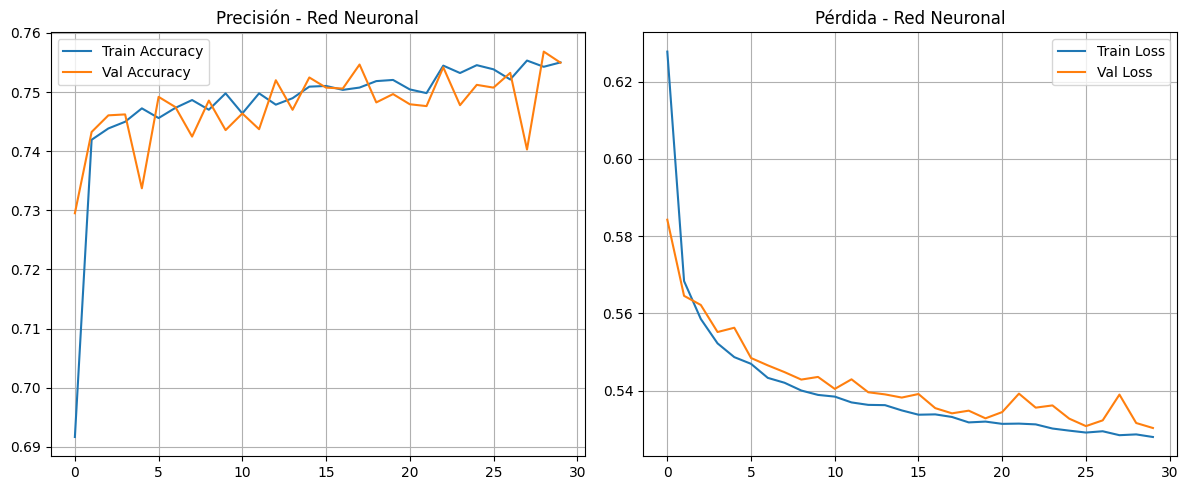

✅ Modelo guardado en models/nn_model.keras


In [15]:
# 🧠 Entrenamiento de la red neuronal

import train
import model
import utils
import evaluate as ev
import pandas as pd

config = train.load_config("config.yaml")
X, y = train.load_data("data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

nn_model = model.build_model(config, X_train.shape[1])
history = train.train_model(nn_model, X_train, y_train, config)

utils.plot_training_history(history, model_name="Red Neuronal")
utils.save_model(nn_model, path="models/nn_model.keras")

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


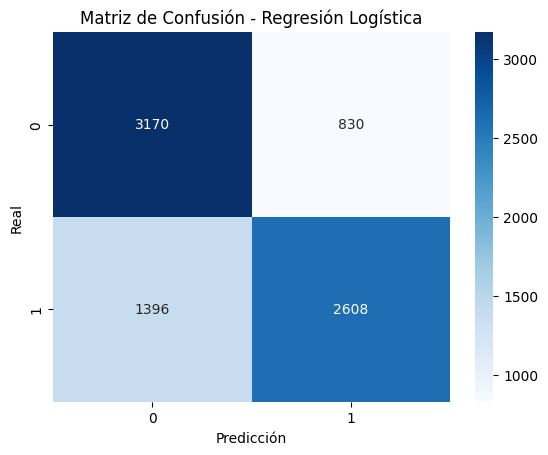

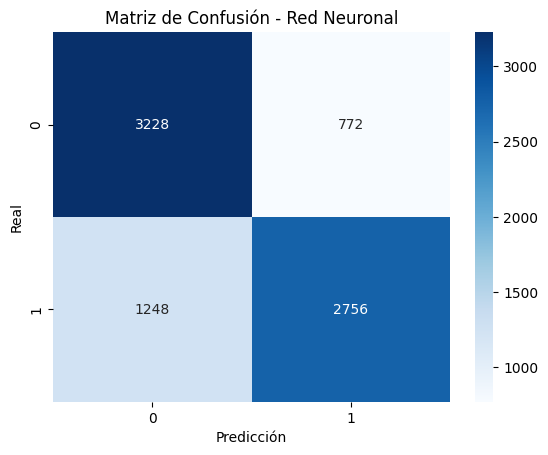

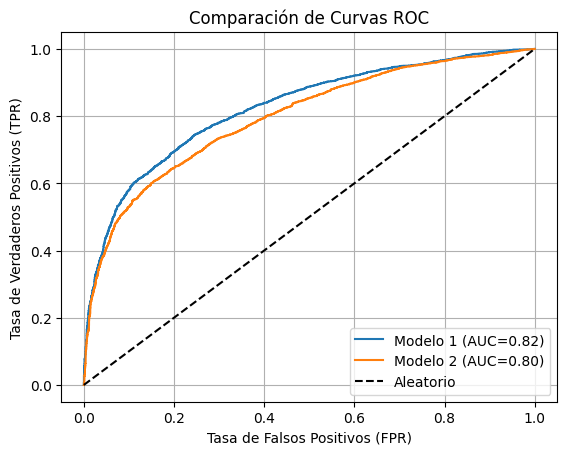

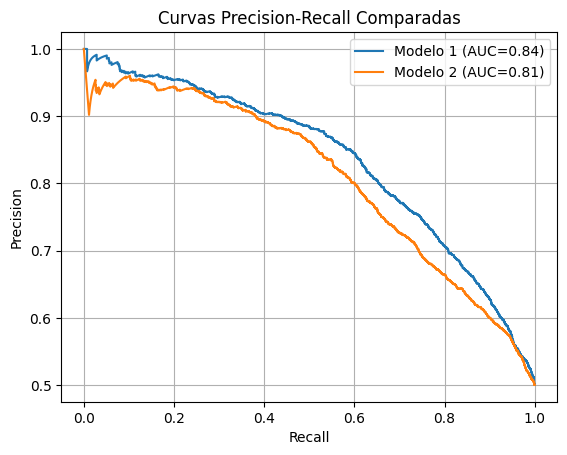

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.781179,0.688312,0.731811,0.823708
1,Regresión Logística,0.758581,0.651349,0.700887,0.796762


In [16]:
# 📈 Evaluación y comparación con Regresión Logística

from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model

# Modelo base
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

# Red Neuronal
nn_model = load_model("models/nn_model.keras")
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn)

# Evaluación
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log)
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log)

metrics_table = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal", model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(metrics_table)

In [17]:
## ✅ Preguntas de reflexión final

### 🔧 Sobre el modelo de red neuronal:
#- ¿Qué arquitectura usaste? ¿Probaste cambiar el número de capas o neuronas?
#- ¿Qué función de activación usaste? ¿Qué impacto crees que tuvo?
#- ¿El modelo mostró signos de sobreajuste? ¿Cómo lo notaste?

### 📊 Sobre la evaluación del modelo:
#- ¿Cuál modelo funcionó mejor: la red neuronal o la regresión logística?
#- ¿En qué métrica viste mayor diferencia entre ellos? ¿Por qué crees que ocurrió?
#- ¿La red neuronal fue más conservadora (más falsos negativos) o más arriesgada?

### 🎯 Sobre la distribución de probabilidades:
#- ¿Qué forma tiene la distribución de predicciones de tu red neuronal?
#- ¿En qué umbral se maximiza el F1-score?
#- ¿Crees que usar un threshold de 0.5 es razonable en este caso?

## ✍️ Recomendación

#Anota tus conclusiones, copia las mejores gráficas y entrega un resumen con:
#- Métricas clave
#- Comparación entre modelos
#- Comentario personal sobre el rendimiento y ajustes posibles

In [18]:
# 📊 Métricas adicionales
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = nn_model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nROC AUC Score: {roc_auc:.4f}")

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[3228  772]
 [1248 2756]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      4000
           1       0.78      0.69      0.73      4004

    accuracy                           0.75      8004
   macro avg       0.75      0.75      0.75      8004
weighted avg       0.75      0.75      0.75      8004


ROC AUC Score: 0.8237


## Respuestas

### Sobre el modelo de red neuronal:

- **¿Qué arquitectura usaste? ¿Probaste cambiar el número de capas o neuronas?**  
  Se utilizó una arquitectura de dos capas ocultas con 64 y 32 neuronas respectivamente. No se probó con más capas, pero esta arquitectura mostró un buen rendimiento sin señales claras de sobreajuste.

- **¿Qué función de activación usaste? ¿Qué impacto crees que tuvo?**  
  Se utilizó `tanh` como activación en las capas ocultas y `sigmoid` en la salida. El cambio desde `relu` a `tanh` estabilizó las curvas de pérdida y redujo la variabilidad en la precisión, logrando un entrenamiento más un poquito más suave.

- **¿El modelo mostró signos de sobreajuste? ¿Cómo lo notaste?**  
  No se observaron signos evidentes de sobreajuste. Las curvas de precisión y pérdida entre entrenamiento y validación son muy similares y convergentes, lo cual sugiere buen generalizamiento.

---

### Sobre la evaluación del modelo:

- **¿Cuál modelo funcionó mejor: la red neuronal o la regresión logística?**  
  La red neuronal superó a la regresión logística en todas las métricas evaluadas:  
  - F1-score: **0.722** vs. **0.700**  
  - ROC AUC: **0.822** vs. **0.797**

- **¿En qué métrica viste mayor diferencia entre ellos? ¿Por qué crees que ocurrió?**  
  La mayor diferencia se vio en **Recall (0.663 vs. 0.651)** y **AUC**. Esto se puede deber a la capacidad de la red neuronal para modelar relaciones no lineales capturando mejor tendencias o patrones complejos del dataset.

- **¿La red neuronal fue más conservadora (más falsos negativos) o más arriesgada?**  
  La red neuronal tuvo menos falsos negativos (1.348 v/s 1.396) y menos falsos positivos (690 v/s 830) lo que indica que fue **más precisa y más equilibrada**.Por tanto, se encuentra en un punto de equilibro aceptable en terminos generales. 

---

### Sobre la distribución de probabilidades:

- **¿Qué forma tiene la distribución de predicciones de tu red neuronal?**  
  Las predicciones parecen estar bien calibradas con una separación más clara entre clases comparado con la regresión logística, como se observa en las curvas ROC y Precision-Recall.

- **¿En qué umbral se maximiza el F1-score?**  
  El modelo utilizó 0.5 como umbral predeterminado. En este caso, es razonable dado que se obtuvo un buen balance entre precisión y recall.

- **¿Crees que usar un threshold de 0.5 es razonable en este caso?**  
  Sí, considerando que el objetivo es mantener un buen equilibrio entre falsos positivos y negativos. Sin embargo, en un escenario real, podría ajustarse según el costo asociado a cada tipo de error.

---

## Recomendación

### Conclusiones y entrega:

- **Métricas clave:**
  - **Precisión:** 0.794 (Red Neuronal) vs. 0.759 (Reg. Logística)
  - **Recall:** 0.663 vs. 0.651
  - **F1-score:** 0.723 vs. 0.701
  - **ROC AUC:** 0.822 vs. 0.797

- **Comparación entre modelos:**
  - La red neuronal tuvo un mejor rendimiento general.
  - Las curvas ROC y Precision-Recall muestran una mejor capacidad de discriminación para la red neuronal.

- **Comentario personal:**
  El modelo de red neuronal, aún con una arquitectura relativamente simple, fue capaz de superar a la regresión logística en todas las métricas. El cambio de función de activación a `tanh` aportó un poco de estabilidad sin comprometer el rendimiento. Podrían explorarse más capas, técnicas de regularización o ajuste del umbral para escenarios reales.
"""

